In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel(r"train_data.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
data.dropna(inplace = True)


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

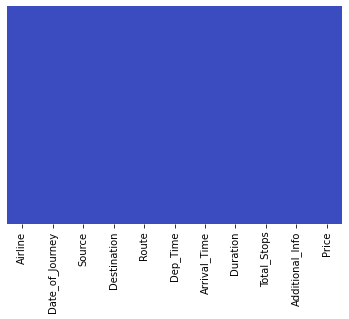

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='coolwarm')

In [7]:
data["journey_day"] = pd.to_datetime(data["Date_of_Journey"],format = "%d/%m/%Y").dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"],format = "%d/%m/%Y").dt.month
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [8]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
data


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [10]:
data["dep_hour"] = pd.to_datetime(data.Dep_Time).dt.hour
data["dep_minute"] = pd.to_datetime(data.Dep_Time).dt.minute
data


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [11]:
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [12]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [13]:
data["arriv_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["arriv_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data



,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [14]:
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [15]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [16]:
data.Total_Stops.unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [18]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    
    

In [19]:
data["duration_hour"] = duration_hour
data["duration_minutes"] = duration_min

In [20]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,11,30,14,10,2,40


In [21]:
data.drop(["Route"], axis = 1, inplace = True)

In [22]:
data.drop(["Duration","Additional_Info"], axis = 1, inplace = True)

In [23]:
data

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [24]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

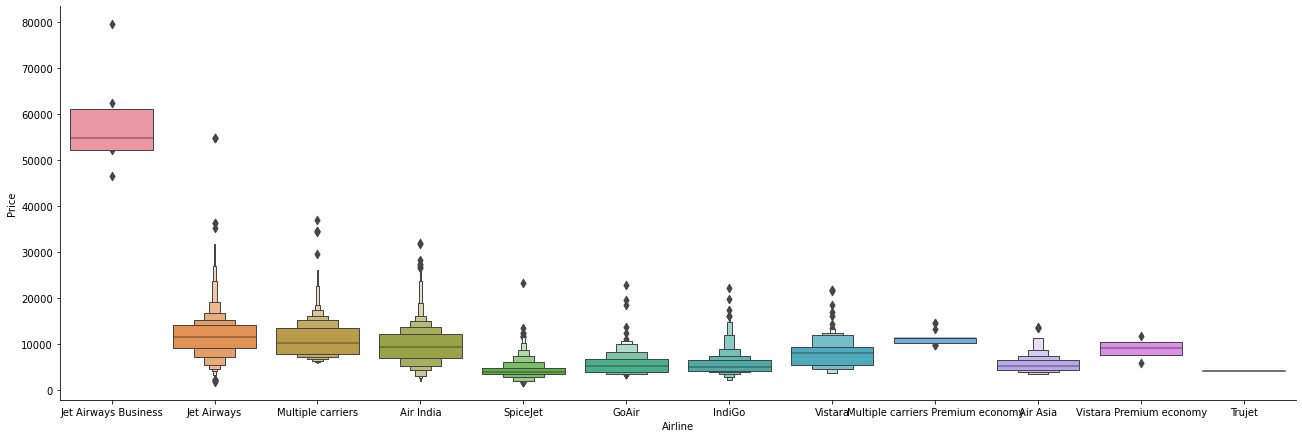

In [25]:
sns.catplot(y="Price", x="Airline", data = data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [26]:
airline = data[["Airline"]]
airline = pd.get_dummies(airline,drop_first= True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
data

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [28]:
data.Source.unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

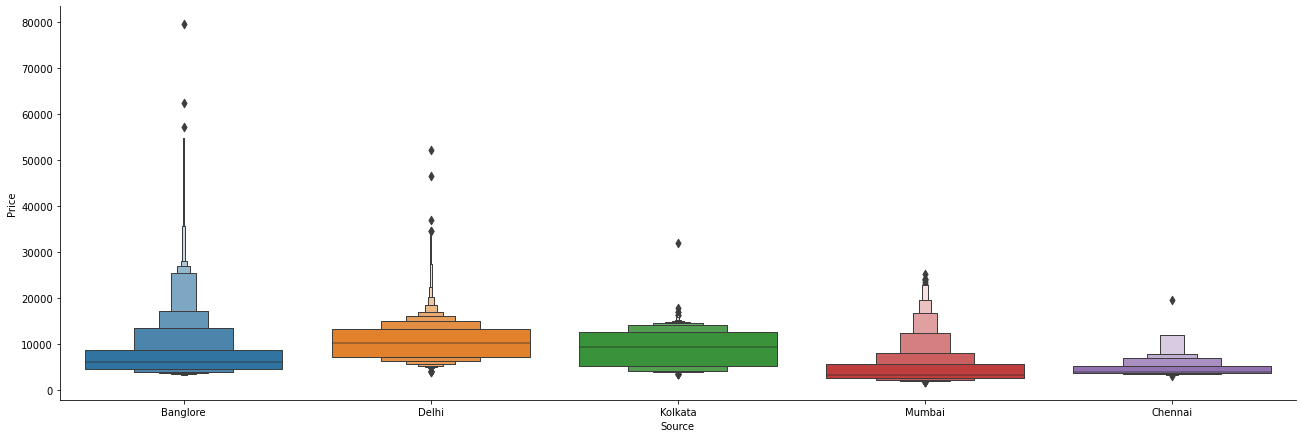

In [29]:
sns.catplot(y="Price", x="Source",data = data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [30]:
source = data[["Source"]]
source = pd.get_dummies(source,drop_first= True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
destination = data[["Destination"]]
destination = pd.get_dummies(destination,drop_first= True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
data = pd.concat([data,airline,source,destination],axis = 1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [33]:
data.drop(["Airline","Source","Destination"], axis=1, inplace = True)

In [34]:
data

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min,duration_hour,duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data.shape


(10682, 30)

In [36]:
data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'arriv_hour', 'arriv_min', 'duration_hour',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [37]:
x = data.loc[:,['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'arriv_hour', 'arriv_min', 'duration_hour',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers','Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [38]:
x.head()


,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arriv_hour,arriv_min,duration_hour,duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [39]:
y = data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

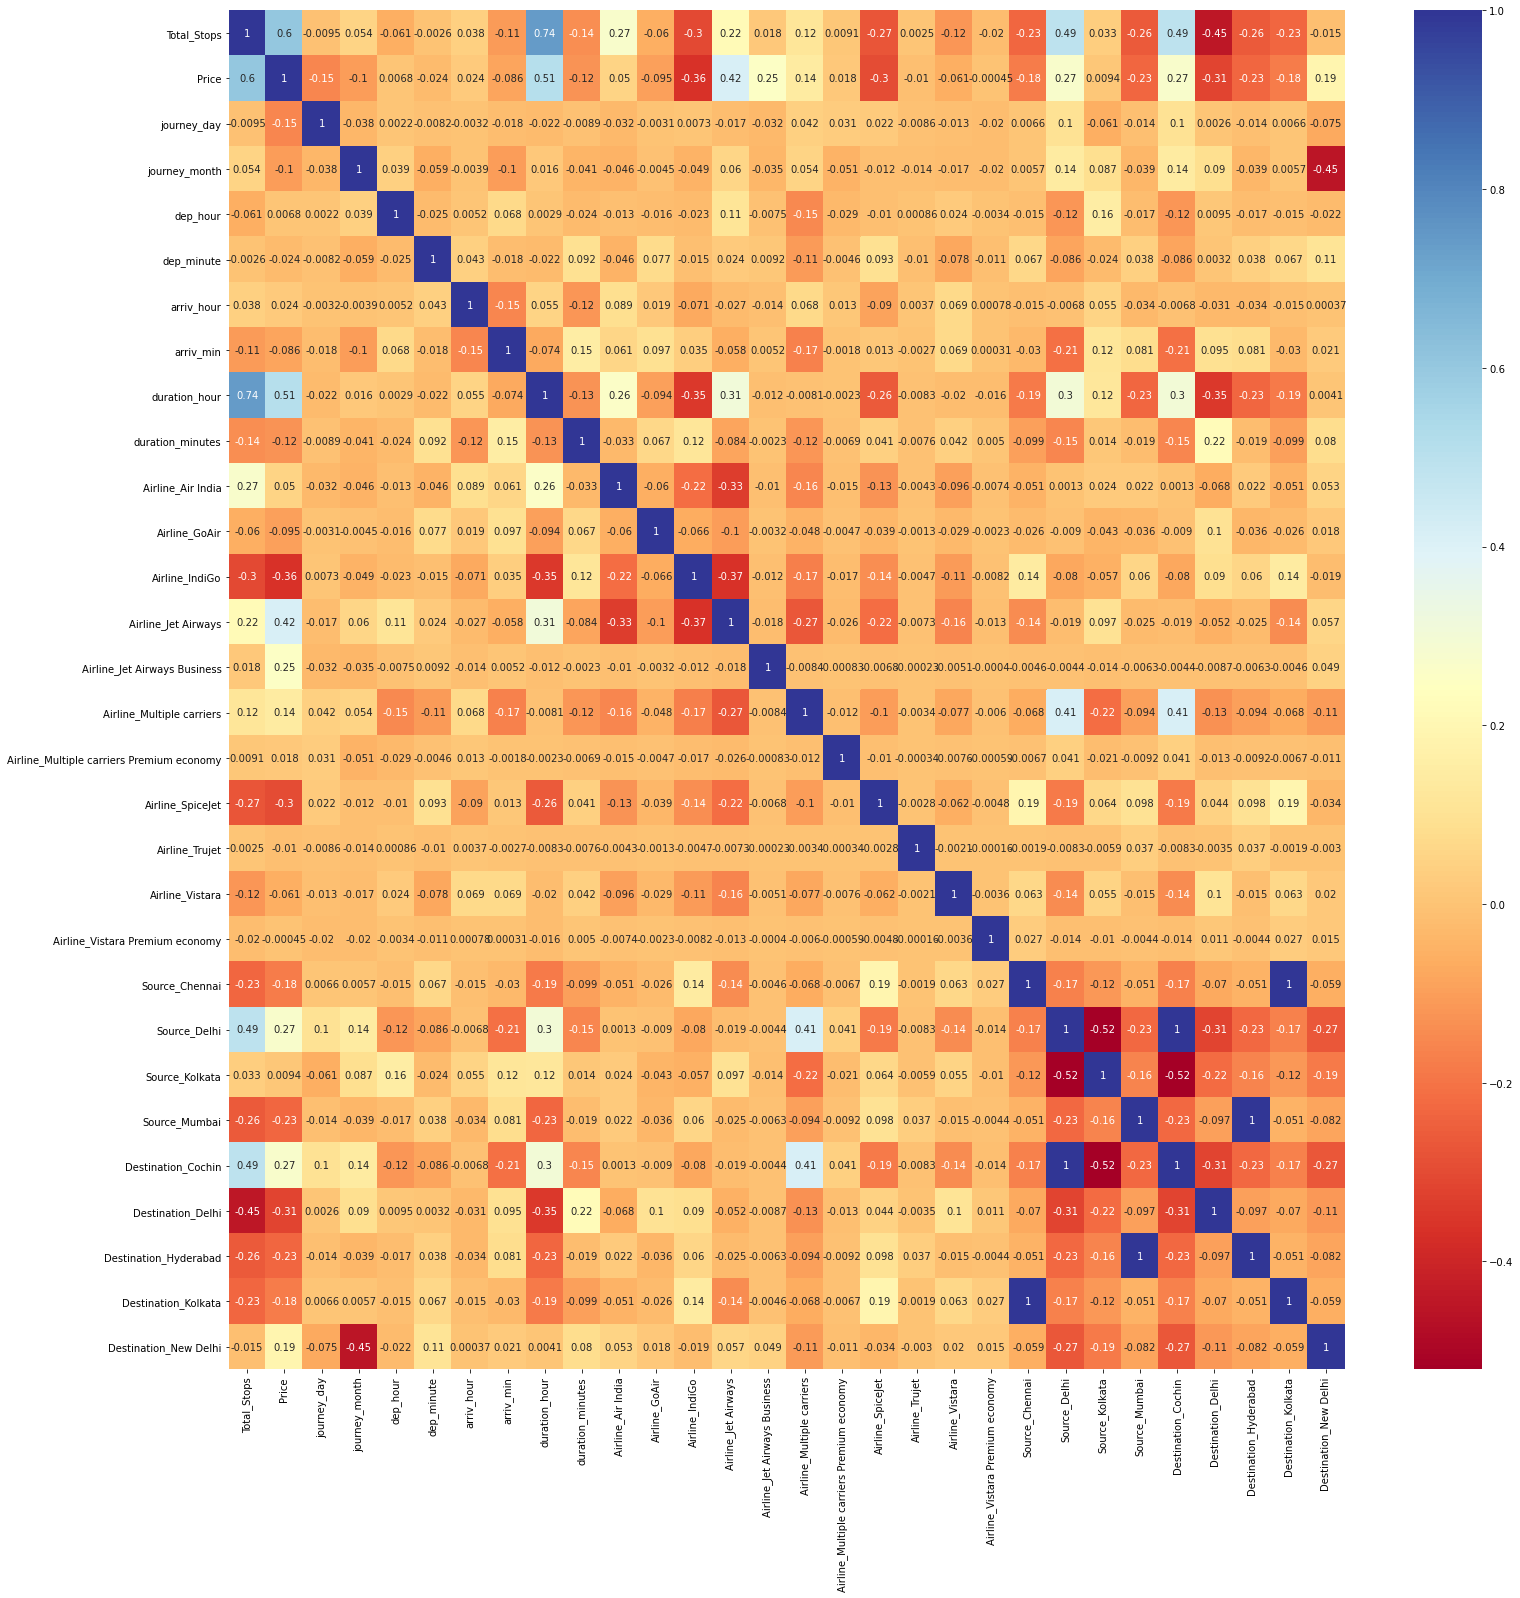

In [40]:
plt.figure(figsize = (25,25))
cor = data.corr()

sns.heatmap(cor, annot = True, cmap = "RdYlBu")
plt.show()

In [41]:
x.shape

(10682, 30)

In [42]:
y.shape

(10682,)

In [43]:
data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'arriv_hour', 'arriv_min', 'duration_hour',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

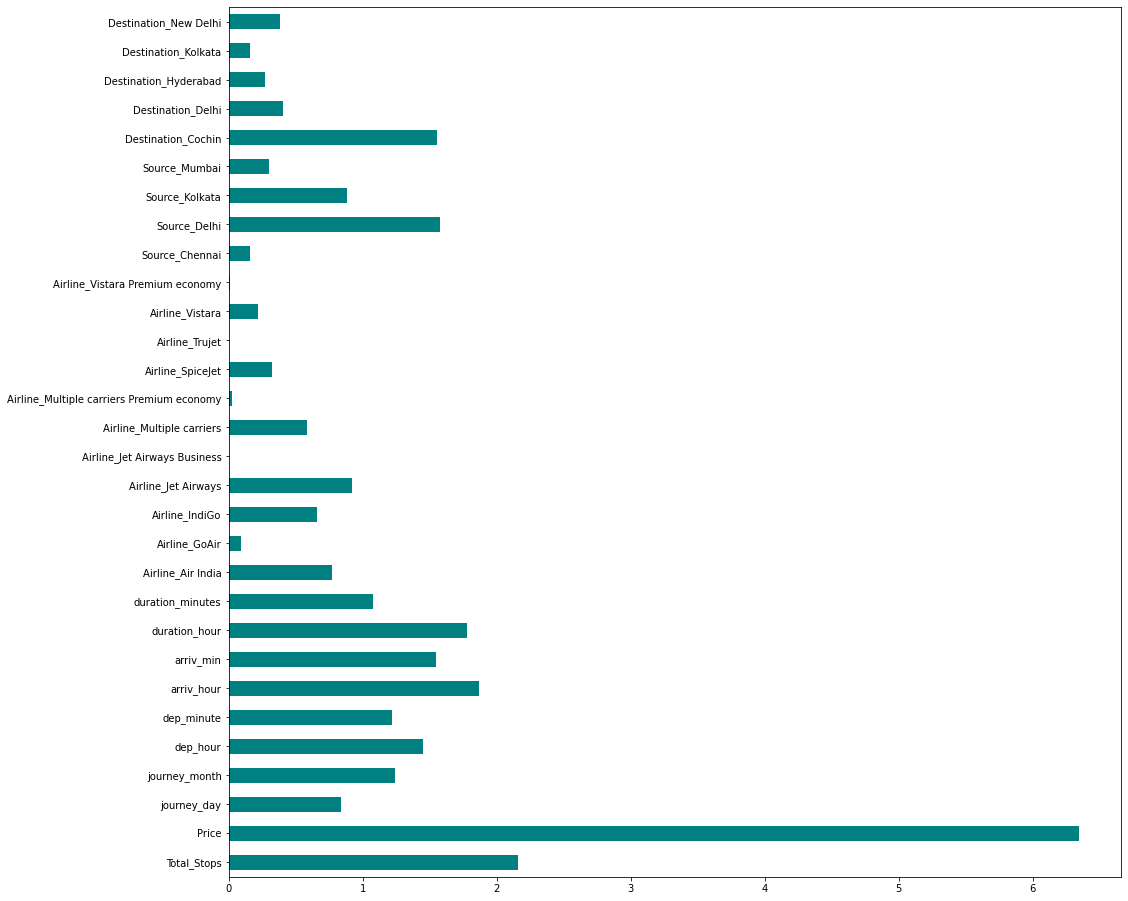

In [44]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

plt.figure(figsize = (16,16))
ranks = mutual_info_classif(x, y)

feat_importances = pd.Series (ranks, data.columns[0:len(data.columns)])
feat_importances.plot (kind='barh', color = 'teal')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, 
                    test_size = .25, random_state = 42) 

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred=regressor.predict(x_test)

In [48]:
regressor.score(x_train, y_train)

1.0

In [49]:
accuracy = (regressor.score(x_test,y_pred))
print("Accuracy=",accuracy)

Accuracy= 1.0


In [50]:
#Use Random Forest Regresion

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
y_pred = reg_rf.predict(x_test)

In [53]:
reg_rf.score(x_train, y_train)

0.9993782329354519

In [54]:
reg_rf.score(x_test, y_test)

0.9995859198084397

In [55]:
accuracy = (reg_rf.score(x_test,y_pred))
print("Accuracy =", accuracy)


Accuracy = 1.0


In [ ]:
sns.displot(y_test-y_pred)
plt.show()

In [ ]:
from sklearn import metrics
print("Error:",np.sqrt(metrics.mean_squared_error
                       (y_test,y_pred)))

In [ ]:
plt.scatter(y_test, y_pred, alpha = .5)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("r2 Square is :", score)


In [ ]:
'''plt. figure(figsize=(15,10))
plt.scatter(x_train,y_pred)'''

plt.plot(x_train,y_train,'g*')#visualise actual training data

y_pred_train=regressor.predict(x_train)#predict y value for training data
plt.plot(x,y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')